<a href="https://colab.research.google.com/github/cuonghip0908/DetectPlateCar/blob/master/coursework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
path = "/content/drive/My Drive"
os.chdir(path)

In [0]:
!git clone https://github.com/phamdinhkhanh/darknetGoogleColab.git

Cloning into 'darknetGoogleColab'...
remote: Enumerating objects: 1241, done.
remote: Counting objects: 100% (1241/1241), done.
remote: Compressing objects: 100% (978/978), done.
remote: Total 1241 (delta 278), reused 1206 (delta 254), pack-reused 0
Receiving objects: 100% (1241/1241), 7.77 MiB | 2.92 MiB/s, done.
Resolving deltas: 100% (278/278), done.
Checking out files: 100% (2035/2035), done.


In [0]:
%cd darknetGoogleColab
!ls
# phân quyền execute module darknet
!chmod +x ./darknet

/content/drive/My Drive/darknetGoogleColab
3rdparty	    DarknetConfig.cmake.in    obj.names
appveyor.yml	    darknetGoogleColab.ipynb  plotTrainLoss.py
backup		    darknet.py		      predictions.jpg
bad_label.list	    darknet_video.py	      README.md
bad.list	    data		      scripts
build		    _gitignore		      src
build.ps1	    image_yolov2.sh	      testdata
build.sh	    image_yolov3.sh	      testyolov3-1c-1000-max-steps.cfg
cfg		    include		      traindata
chart.png	    json_mjpeg_streams.sh     train.txt
cmake		    LICENSE		      _travis.yml
CMakeLists.txt	    Makefile		      valid.txt
CMakeSettings.json  net_cam_v3.sh	      video_v2.sh
coursework2.ipynb   obj			      video_yolov3.sh
darknet		    obj.data		      yolov3-1c-1003-max-steps.cfg
darknet53.conv.74   object_detection_yolo.py


In [0]:
import glob2
import numpy as np

all_files = []
for ext in ["*.jpg"]:
  images = glob2.glob(os.path.join("traindata/", ext))
  all_files += images

rand_idx = np.random.randint(0, len(all_files), 200)

# Create train.txt
with open("train.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    # if idx not in rand_idx:
    f.write(all_files[idx]+'\n')

# Create valid.txt
with open("valid.txt", "w") as f:
  for idx in np.arange(len(all_files)):
    if idx in rand_idx:
      f.write(all_files[idx]+'\n')

In [0]:
# Create obj.names config file
!echo bsx > obj.names

In [0]:
# Config obj.data config file
!echo classes=1 > obj.data
!echo train=train.txt >> obj.data
!echo valid=test.txt >> obj.data
!echo names=obj.names >> obj.data
!echo backup=backup >> obj.data

In [0]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
      
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
os.path.exists("obj.data")
os.path.exists("yolov3-1c-1003-max-steps.cfg")

True

In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-04-17 04:31:02--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   446KB/s    in 8m 5s   

2020-04-17 04:39:10 (327 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
!mkdir backup

mkdir: cannot create directory ‘backup’: File exists


In [0]:
!./darknet detector train obj.data yolov3-1c-1003-max-steps.cfg darknet53.conv.74 -dont_show


 988: 0.555723, 0.552132 avg loss, 0.000001 rate, 16.966068 seconds, 63232 images
Loaded: 0.000040 seconds

 989: 0.583571, 0.555276 avg loss, 0.000001 rate, 16.984272 seconds, 63296 images
Loaded: 0.000084 seconds

 990: 0.564989, 0.556247 avg loss, 0.000001 rate, 17.026727 seconds, 63360 images
Resizing
704 x 704 
 try to allocate additional workspace_size = 145.72 MB 
 CUDA allocate done! 
Loaded: 0.117865 seconds

 991: 0.549012, 0.555524 avg loss, 0.000001 rate, 12.633269 seconds, 63424 images
Loaded: 0.000045 seconds

 992: 0.597810, 0.559752 avg loss, 0.000001 rate, 12.836101 seconds, 63488 images
Loaded: 0.000065 seconds

 993: 0.458360, 0.549613 avg loss, 0.000001 rate, 12.802300 seconds, 63552 images
Loaded: 0.000051 seconds

 994: 0.562650, 0.550917 avg loss, 0.000001 rate, 12.837430 seconds, 63616 images
Loaded: 0.000061 seconds

 995: 0.513575, 0.547182 avg loss, 0.000001 rate, 12.820725 seconds, 63680 images
Loaded: 0.000060 seconds

 996: 0.433674, 0.535832 avg loss, 0.

In [0]:
!ls backup


yolov3-1c-1000-max-steps_last.weights  yolov3-1c-1003-max-steps_final.weights
yolov3-1c-1003-max-steps_1000.weights  yolov3-1c-1003-max-steps_last.weights


layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

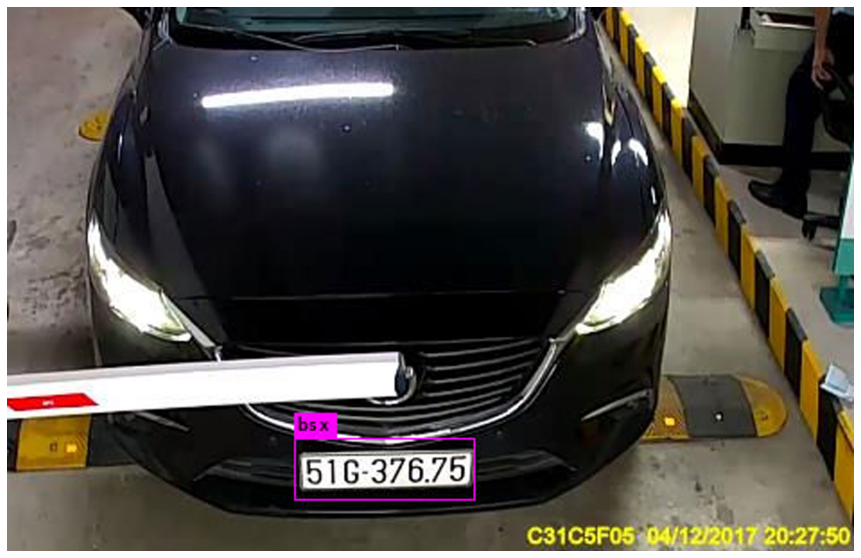

In [0]:
!./darknet detector test obj.data testyolov3-1c-1000-max-steps.cfg backup/yolov3-1c-1003-max-steps_final.weights -thresh 0.3 testdata/17421.jpg -dont_show
imShow('predictions.jpg')

In [0]:
def firstCrop(predictions):
    predictions.sort(key=lambda x: x.get('confidence'))
    xtop = predictions[-1].get('topleft').get('x')
    ytop = predictions[-1].get('topleft').get('y')
    xbottom = predictions[-1].get('bottomright').get('x')
    ybottom = predictions[-1].get('bottomright').get('y')
    firstCrop = img[ytop:ybottom, xtop:xbottom]
    cv2.rectangle(img,(xtop,ytop),(xbottom,ybottom),(0,255,0),3)
    return firstCrop
firstCropImg=firstCrop(predictions.jpg)

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

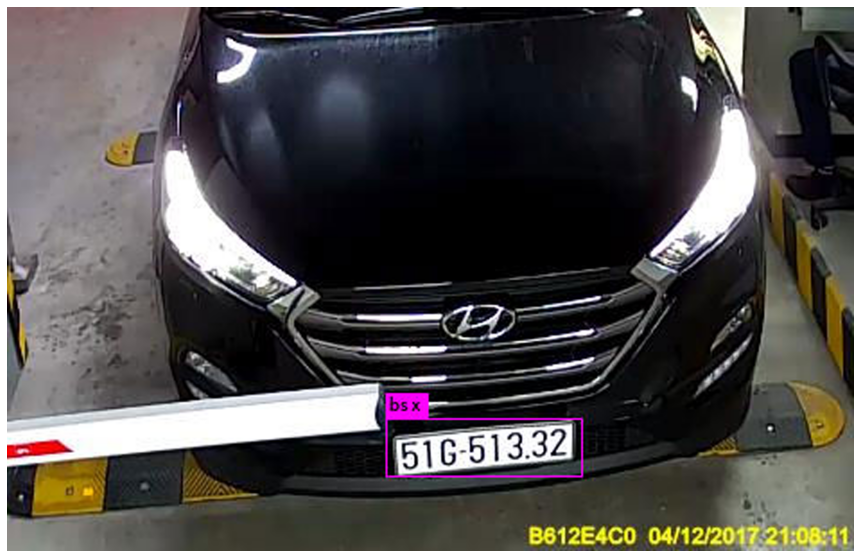

In [0]:
!./darknet detector test obj.data testyolov3-1c-1000-max-steps.cfg backup/yolov3-1c-1003-max-steps_final.weights -thresh 0.25 testdata/17618.jpg -dont_show
imShow('predictions.jpg')